# U.S. Medical Insurance Costs

This step imports Python libraries needed for data analysis, visualization, and machine learning

Objective: Load and inspect the data

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [158]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [159]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [160]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Distribution of Insurance Charges**

A histogram is used to visualize how insurance charges are distributed.
It shows whether most values are low, high, or spread across a range.

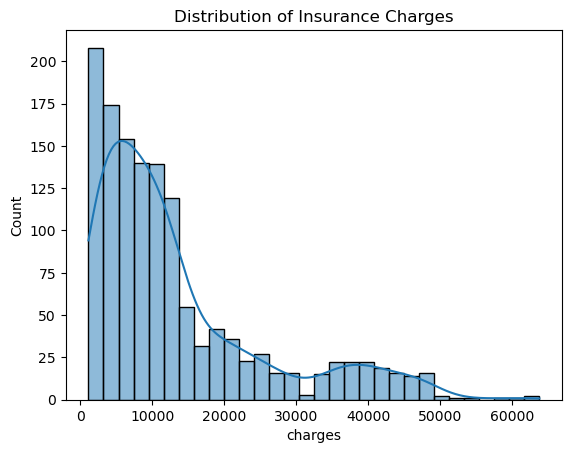

In [161]:
# Distribution of insurance charges
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

**Age vs Insurance Charges**

This scatter plot shows the relationship between age and insurance cost.
It helps identify whether insurance charges increase with age.

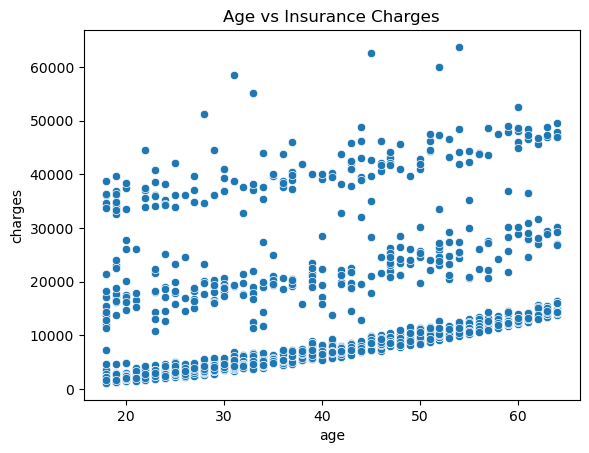

In [180]:
# Age vs Charges
sns.scatterplot(x='age', y='charges', data=df)
plt.title("Age vs Insurance Charges")
plt.show()

**BMI vs Insurance Charges**

This visualization helps understand how Body Mass Index (BMI) affects medical costs.
Higher BMI values may lead to higher insurance charges.

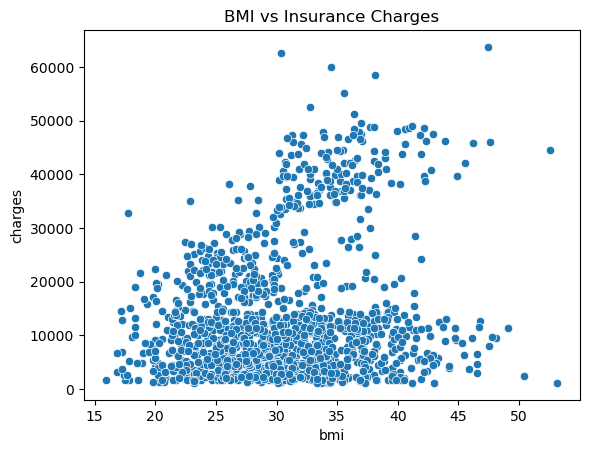

In [163]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("BMI vs Insurance Charges")
plt.show()

**Smoking Status vs Charges**


This comparison shows how smoking affects insurance costs.
It clearly highlights that smokers generally pay higher charges than non-smokers.

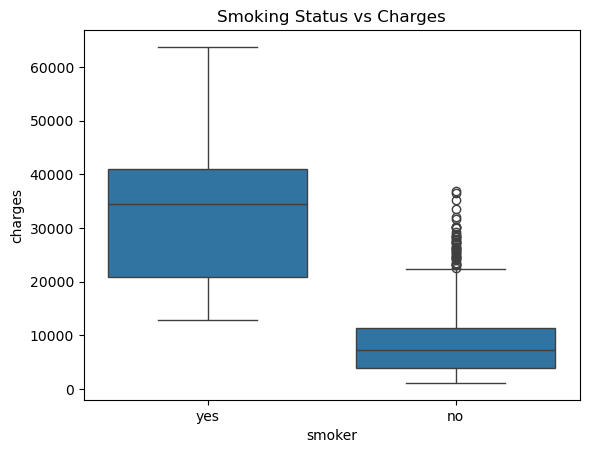

In [164]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Smoking Status vs Charges")
plt.show()


**Gender-wise Cost Comparison**

This analysis compares average insurance charges between males and females
to see if gender has a significant impact on medical costs

In [165]:
# Average charges by smoking status
df.groupby('smoker')['charges'].mean()


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [166]:
# Average charges by gender
df.groupby('sex')['charges'].mean()


sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

**Correlation Analysis**


Correlation shows the strength of relationship between numerical variables.
Values closer to +1 or -1 indicate strong relationships, while values near 0 show weak relationships.

In [167]:
# Correlation between numerical variables
df[['age', 'bmi', 'children', 'charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


**Encoding Categorical Variables**

Machine learning models only work with numbers.
So, categorical values like gender and smoking status are converted into numerical form.

In [168]:
# Convert categorical variables into numbers
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

**One-Hot Encoding Regions**


The region column is split into multiple binary columns.
This prevents the model from assuming any order among regions.

In [169]:
# One-hot encode region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Features and target
X = df.drop('charges', axis=1)
y = df['charges']


**Feature and Target Selection**


Features (X) are the input variables used for prediction

Target (y) is the insurance charge we want to predict

**Splitting Data into Training and Testing Sets**


The dataset is divided into:

Training data → used to train the model

Testing data → used to evaluate model performance

This ensures fair model evaluation.

In [155]:
#Build a Predictive Model

#Objective: Predict insurance charges using simple regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Building the Linear Regression Model**

Linear Regression is used to predict insurance charges based on input features.
It finds the best-fit line that explains the relationship between variables.

**Making Predictions**

The trained model predicts insurance charges for the test data.
These predicted values are compared with actual values.

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 4181.194473753645
MSE: 33596915.85136144
R2 Score: 0.7835929767120724


**Training the Model**


The model learns patterns from the training data by adjusting its coefficients.

**Model Evaluation**


MAE → Average prediction error

MSE → Penalizes larger errors

R² Score → How well the model explains the data

Higher R² means better model performance.

In [172]:
# Model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients


,Feature,Coefficient
0,age,256.975706
1,sex,18.591692
2,bmi,337.092552
3,children,425.278784
4,smoker,23651.128856
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


**Interpreting Model Coefficients**


Coefficients show how much each feature affects insurance cost.

Positive value → increases charges

Negative value → decreases charges

**Key Insights**


This stage summarizes important findings such as:

Smoking has the highest impact on cost

Age and BMI increase insurance charges

Region has minimal effect

**Conclusion**

Explanation:
The project successfully analyzed medical insurance data and built a predictive model
that provides meaningful insights into healthcare costs.